## 1. Historical

[*********************100%***********************]  1 of 1 completed

Historical VaR (95% confidence level): -3.48%


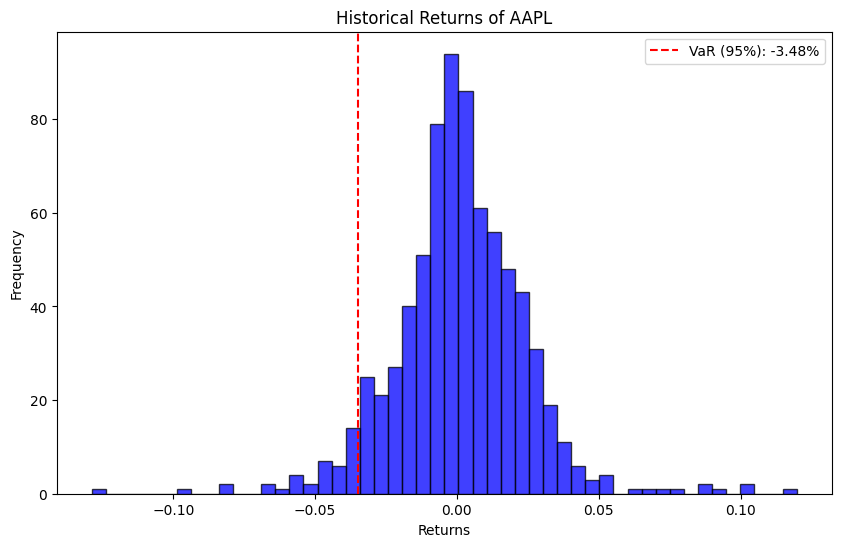

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data for a stock
df = yf.download("AAPL", start="2020-01-01", end="2023-01-01")

def calc_histo_VaR(data, confidence_level = 0.95):
    returns = data['Adj Close'].pct_change().dropna()

    # Calculate the historical VaR at 95% confidence level
    VaR_historical = np.percentile(returns, (1 - confidence_level) * 100)
    print(f"Historical VaR (95% confidence level): {VaR_historical:.2%}")

    return VaR_historical

VaR_historical = calc_histo_VaR(data=df)

def histo_var_return_plot(data, VaR):
    returns = data['Adj Close'].pct_change().dropna()

    # Plot the historical returns and VaR threshold
    plt.figure(figsize=(10, 6))
    plt.hist(returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
    plt.axvline(VaR_historical, color='red', linestyle='--', label=f'VaR (95%): {VaR_historical:.2%}')
    plt.title('Historical Returns of AAPL')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.legend()

    return plt

histo_plt = histo_var_return_plot(data=df, VaR=VaR_historical)
histo_plt.show()

## 2. Variance-Covariance Method Example

[*********************100%***********************]  1 of 1 completed
/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Variance-Covariance VaR (95% confidence level): -3.72%


TypeError: unsupported format string passed to Series.__format__

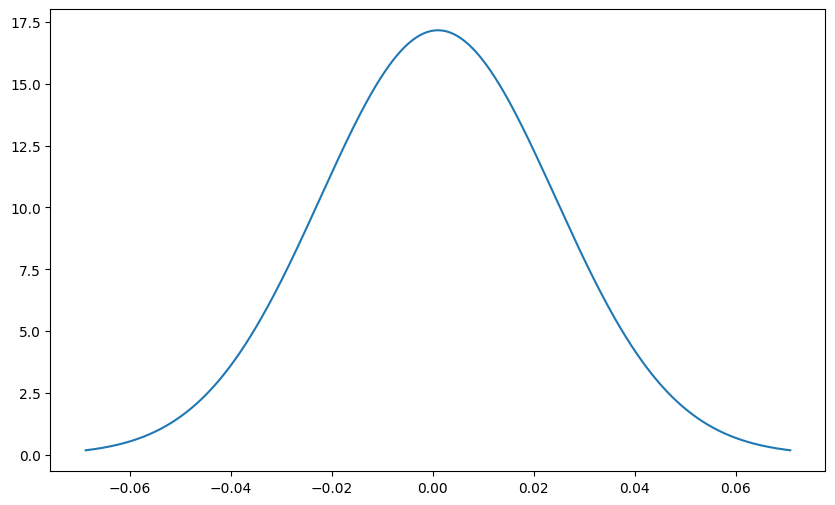

In [20]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fetch historical data for a stock
df = yf.download("AAPL", start="2020-01-01", end="2023-01-01")

def calc_covariance_VaR(data, confidence_level = 0.95):
    returns = data['Adj Close'].pct_change().dropna()
    
    # Calculate the mean and standard deviation of returns
    mean_return = np.mean(returns)
    std_dev = np.std(returns)

    # Calculate the VaR at 95% confidence level using the Z-score
    z_score = norm.ppf(1 - confidence_level)
    VaR_variance_covariance = mean_return + z_score * std_dev

    print(f"Variance-Covariance VaR (95% confidence level): {VaR_variance_covariance.iloc[0]:.2%}")

    return VaR_variance_covariance

VaR_variance_covariance = calc_covariance_VaR(data=df)

def covariance_var_return_plot(data, VaR):
    returns = data['Adj Close'].pct_change().dropna()

    # Plot the normal distribution and VaR threshold
    plt.figure(figsize=(10, 6))
    x = np.linspace(mean_return - 3*std_dev, mean_return + 3*std_dev, 1000)
    y = norm.pdf(x, mean_return, std_dev)
    plt.plot(x, y, label='Normal Distribution')
    plt.axvline(VaR_variance_covariance, color='red', linestyle='--', label=f'VaR (95%): {VaR_variance_covariance:.2%}')
    plt.fill_between(x, 0, y, where=(x <= VaR_variance_covariance), color='red', alpha=0.5)
    plt.title('Normal Distribution of Returns with VaR Threshold')
    plt.xlabel('Returns')
    plt.ylabel('Probability Density')
    plt.legend()

    return plt

cov_plt = covariance_var_return_plot(data=df, VaR=VaR_variance_covariance)
cov_plt.show()


## 3. Monte Carlo Simulation Example

[*********************100%***********************]  1 of 1 completed
/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Monte Carlo VaR (95% confidence level): -29.89%


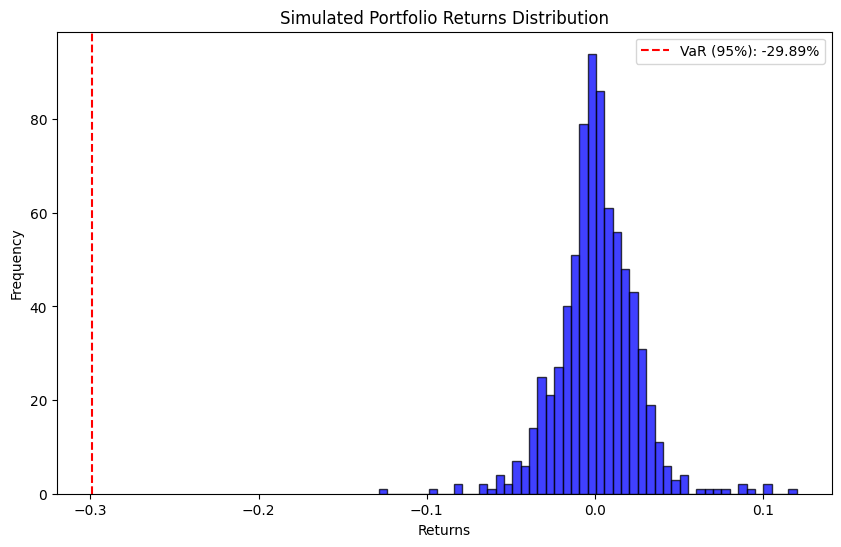

In [24]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data for a stock
df = yf.download("AAPL", start="2020-01-01", end="2023-01-01")

def calc_monte_carlo_VaR(data, confidence_level = 0.95):

    returns = data['Adj Close'].pct_change().dropna()
    
    # Simulate future returns using Monte Carlo
    num_simulations = 10000
    simulation_horizon = 252  # Number of trading days in a year
    simulated_returns = np.random.normal(np.mean(returns), np.std(returns), (simulation_horizon, num_simulations))
    
    # Calculate the simulated portfolio values
    initial_investment = 1000000  # $1,000,000
    portfolio_values = initial_investment * np.exp(np.cumsum(simulated_returns, axis=0))
    
    # Calculate the portfolio returns
    portfolio_returns = portfolio_values[-1] / portfolio_values[0] - 1
    
    # Calculate the VaR at 95% confidence level
    confidence_level = 0.95
    VaR_monte_carlo = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

    print(f"Monte Carlo VaR (95% confidence level): {VaR_monte_carlo:.2%}")
    
    return VaR_monte_carlo

VaR_monte_carlo = calc_monte_carlo_VaR(data=df)

def monte_carlo_var_return_plot(data, VaR):

    portfolio_returns = data['Adj Close'].pct_change().dropna()

    # Plot the distribution of simulated portfolio returns and VaR threshold
    plt.figure(figsize=(10, 6))
    plt.hist(portfolio_returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
    plt.axvline(VaR_monte_carlo, color='red', linestyle='--', label=f'VaR (95%): {VaR_monte_carlo:.2%}')
    plt.title('Simulated Portfolio Returns Distribution')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.legend()

    return plt

monte_carlo = monte_carlo_var_return_plot(data=df, VaR=VaR_monte_carlo)
monte_carlo.show()
